# Analysing The Climate Data

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import os
import matplotlib.pyplot as plt

In [2]:
# Get the current working directory
cwd = os.getcwd()
# List all files in the directory and filter for .csv files
csv_files = [f for f in os.listdir(cwd) if os.path.isfile(os.path.join(cwd, f)) and f.endswith('.csv')]
print(csv_files)

['_aet.csv', '_def.csv', '_pdsi.csv', '_pet.csv', '_pr.csv', '_ro.csv', '_soil.csv', '_srad.csv', '_swe.csv', '_tmmn.csv', '_tmmx.csv', '_vap.csv', '_vpd.csv', '_vs.csv']


In [3]:
dates = [20101101,20130701,20130901,20130101,20130301,20130501,20140501,20140301,20140101,20100801,20100601,20121101,20100401,20140901,20100201,20140701,20110901,20121001,20110501,20131101,20110701,20110101,20110301,20111001,20120901,20141101,20120301,20120101,20120701,20120501,20101201,20130801,20101001,20130201,20111201,20130401,20130601,20140401,20140201,20100901,20100701,20121201,20140801,20100501,20140601,20100301,20150101,20100101,20110601,20131001,20110801,20131201,20110201,20110401,20120801,20111101,20141201,20141001,20120201,20120601,20120401]
dates = [str(x) for x in dates]
dates.sort()
# rmove dates last elemtent
# dates = dates[:-1]
feature_names = [x.split('_')[1] for x in csv_files]
print(feature_names)

['aet.csv', 'def.csv', 'pdsi.csv', 'pet.csv', 'pr.csv', 'ro.csv', 'soil.csv', 'srad.csv', 'swe.csv', 'tmmn.csv', 'tmmx.csv', 'vap.csv', 'vpd.csv', 'vs.csv']


In [4]:
print(dates)

['20100101', '20100201', '20100301', '20100401', '20100501', '20100601', '20100701', '20100801', '20100901', '20101001', '20101101', '20101201', '20110101', '20110201', '20110301', '20110401', '20110501', '20110601', '20110701', '20110801', '20110901', '20111001', '20111101', '20111201', '20120101', '20120201', '20120301', '20120401', '20120501', '20120601', '20120701', '20120801', '20120901', '20121001', '20121101', '20121201', '20130101', '20130201', '20130301', '20130401', '20130501', '20130601', '20130701', '20130801', '20130901', '20131001', '20131101', '20131201', '20140101', '20140201', '20140301', '20140401', '20140501', '20140601', '20140701', '20140801', '20140901', '20141001', '20141101', '20141201', '20150101']


In [5]:
# random number between 0 and 1660
random_number = np.random.randint(0, 21000)
print("Random number: ", random_number)
df = pd.read_csv(csv_files[0])
random_row = df.iloc[random_number]
PID = random_row['Point_ID']
print("Point ID: ", PID)

Random number:  14664
Point ID:  47541548


In [6]:
oc_df = pd.read_csv('D:\python\SoilNet\dataset\LUCAS_2015_all.csv')
oc_df = oc_df.loc[:, ['OC', 'Point_ID']]

In [7]:
oc_df

OC  Point_ID
0      24.6  26581768
1      21.9  26581792
2      18.4  26581954
3      48.0  26601784
4      25.2  26601978
...     ...       ...
21854   8.4  64881666
21855  10.8  64901668
21856   6.7  64901672
21857   5.7  64961676
21858  18.1  64981672

[21859 rows x 2 columns]

In [8]:
rows = []
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df = pd.merge(df,oc_df, on='Point_ID')
    df = df.sort_index(axis=1)
    df = df[df['Point_ID'] == PID]
    df = df.iloc[:, 0:len(dates)]
    rows.append(df.values[0])

In [9]:
rows[0]

array([397., 482., 705., 561., 367., 207.,  59.,  40., 801., 768., 468.,
       388., 337., 463., 693., 811., 691., 255.,  80.,  48., 221., 808.,
       531., 408., 401., 449., 566., 637., 168.,  75.,  90.,  77., 587.,
       673., 431., 415., 416., 468., 486., 403., 132., 139.,  41., 449.,
       358., 330., 522., 354., 401., 460., 669., 715., 471., 190.,  91.,
        44., 320., 640., 533., 380., 419.])

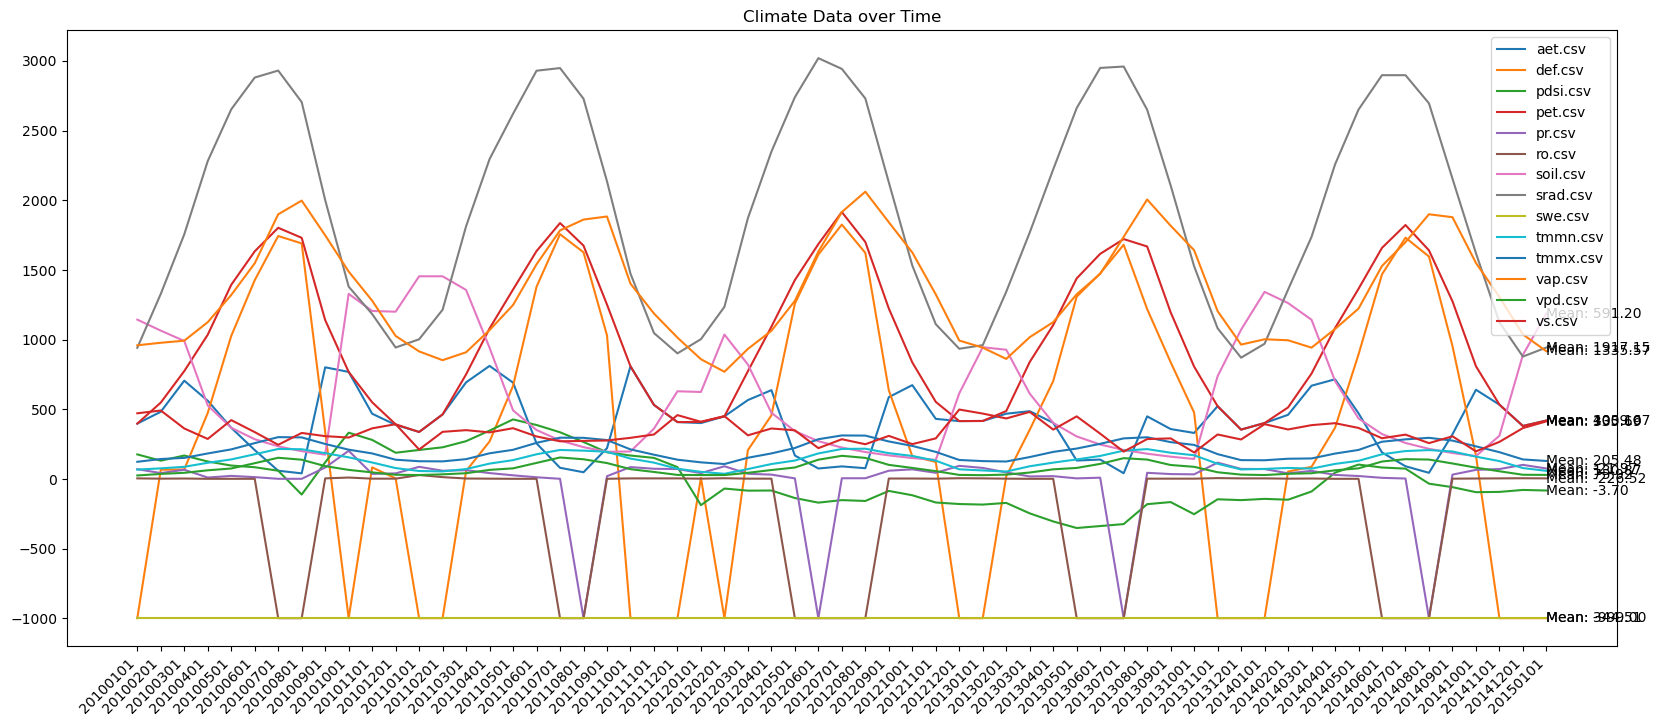

In [10]:
plt.figure(figsize=(20, 8))
# Plot the data
for i, arr in enumerate(rows):
    plt.plot(dates, arr, label=feature_names[i])
    # Calculate and add the mean value label
    mean_val = np.mean(arr)
    
    plt.text(dates[-1], arr[-1], f"Mean: {mean_val:.2f}", va='center', ha='left', color='black')

# Set the plot title and legend
plt.title('Climate Data over Time')
plt.legend(loc='upper right')
plt.xticks(dates, rotation=45, ha='right')
# Show the plot
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Normalizing the Data

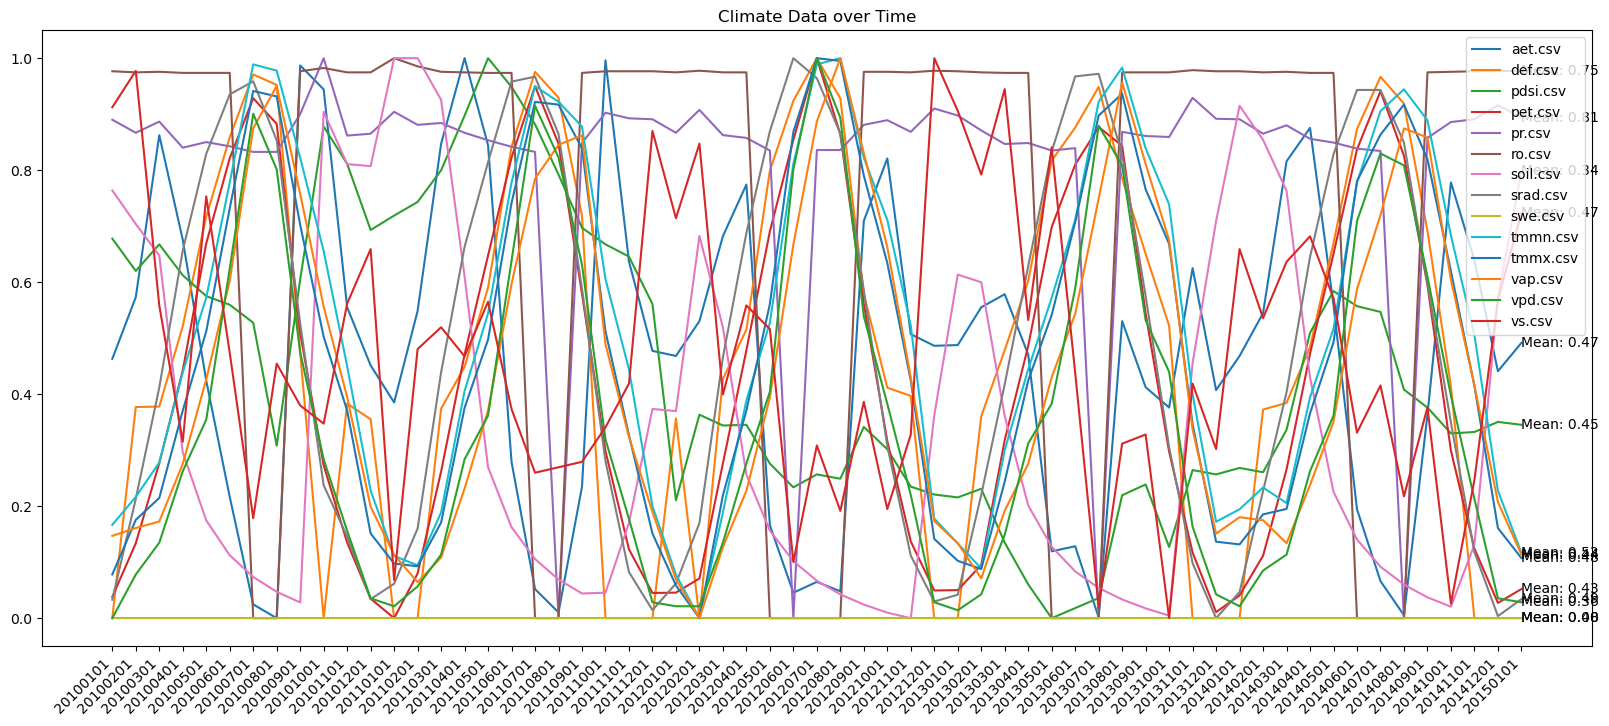

In [12]:
plt.figure(figsize=(20, 8))
# Plot the data
for i, arr in enumerate(rows):
    mm = MinMaxScaler()
    mm.fit(arr.reshape(-1, 1))
    arr= mm.transform(arr.reshape(-1, 1))
    arr = arr.reshape(-1)
    
    plt.plot(dates, arr, label=feature_names[i])
    # Calculate and add the mean value label
    mean_val = np.mean(arr)
    plt.text(dates[-1], arr[-1], f"Mean: {mean_val:.2f}", va='center', ha='left', color='black')

# Set the plot title and legend
plt.title('Climate Data over Time')
plt.legend(loc='upper right')
plt.xticks(dates, rotation=45, ha='right')
# Show the plot
plt.show()

## Standardaizing the data

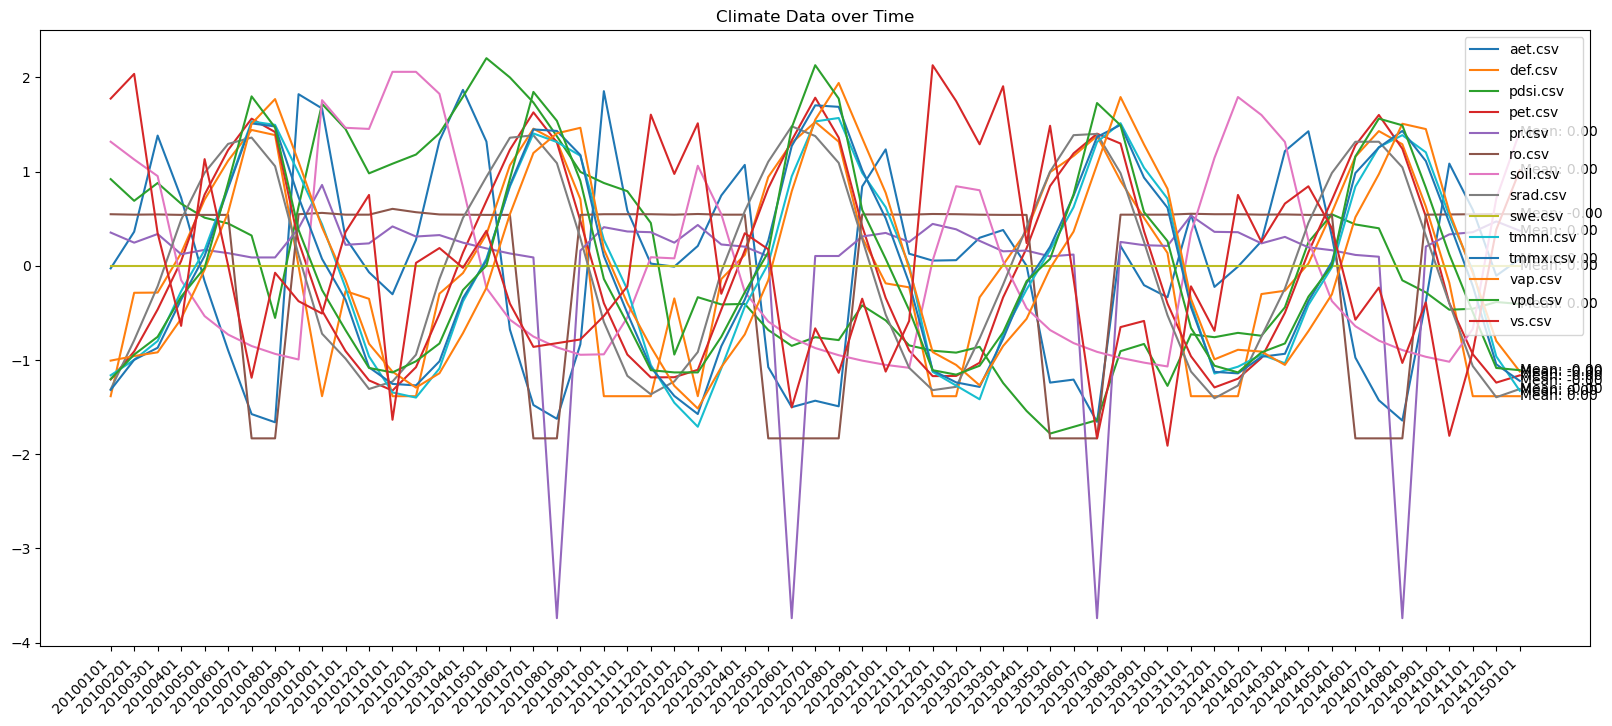

In [13]:
plt.figure(figsize=(20, 8))
# Plot the data
for i, arr in enumerate(rows):
    ss = StandardScaler()
    ss.fit(arr.reshape(-1, 1))
    arr= ss.transform(arr.reshape(-1, 1))
    arr = arr.reshape(-1)
    
    plt.plot(dates, arr, label=feature_names[i])
    # Calculate and add the mean value label
    mean_val = np.mean(arr)
    plt.text(dates[-1], arr[-1], f"Mean: {mean_val:.2f}", va='center', ha='left', color='black')

# Set the plot title and legend
plt.title('Climate Data over Time')
plt.legend(loc='upper right')
plt.xticks(dates, rotation=45, ha='right')
# Show the plot
plt.show()

## Interpreting the data
- swe data seems to be `-999` most of the time.

<span style="color:#ff4444;">This will result in low correlation with the OC, -999 values should be replace with a proper placeholder value, when feeding it in to the LSTM</span> 

- Maybe mean vlue of others instead of -999


In [14]:
rows = []
for csv_file in csv_files[0:-1]:
    df = pd.read_csv(csv_file)
    df = pd.merge(df,oc_df, on='Point_ID')
    df = df.sort_index(axis=1)
    df = df[df['Point_ID'] == PID]
    df = df.iloc[:, 0:len(dates)]
    rows.append(df.values[0])

In [15]:
corr_dict_w_999 = {}
print("Correlation: ")
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df = pd.read_csv(csv_file)
    df = pd.merge(df,oc_df, on='Point_ID')
    df = df.sort_index(axis=1)
    df_ts = df.iloc[:, :len(dates)]
    df['ts_mean'] = df_ts.mean(axis=1)
    correlation = df['OC'].corr(df['ts_mean'])
    print(f"{csv_file.split('_')[1]} and OC: {correlation:.2f}")
    corr_dict_w_999[csv_file.split('_')[1]] = correlation

Correlation: 
aet.csv and OC: -0.26
def.csv and OC: -0.31
pdsi.csv and OC: 0.19
pet.csv and OC: -0.33
pr.csv and OC: 0.17
ro.csv and OC: -0.13
soil.csv and OC: 0.15
srad.csv and OC: -0.28
swe.csv and OC: 0.30
tmmn.csv and OC: -0.30
tmmx.csv and OC: -0.34
vap.csv and OC: -0.27
vpd.csv and OC: -0.28
vs.csv and OC: 0.04


In [16]:
# Creating Correlation Dcitionary without -999 values
corr_dict_wo_999 = {}
print("Correlation: ")
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df = pd.merge(df,oc_df, on='Point_ID')
    df = df.sort_index(axis=1)
    df_ts = df.iloc[:, :len(dates)]
    df_ts.replace(-999, np.nan, inplace=True) # convering -999 to NaN
    df['ts_mean'] = df_ts.mean(axis=1, skipna=True) # calculating mean ignoring NaN
    correlation = df['OC'].corr(df['ts_mean'])
    print(f"{csv_file.split('_')[1]} and OC: {correlation:.2f}")
    corr_dict_wo_999[csv_file.split('_')[1]] = correlation
    


Correlation: 
aet.csv and OC: 0.15
def.csv and OC: -0.28
pdsi.csv and OC: 0.19
pet.csv and OC: -0.27
pr.csv and OC: 0.16
ro.csv and OC: 0.27
soil.csv and OC: 0.15
srad.csv and OC: -0.28
swe.csv and OC: 0.27
tmmn.csv and OC: -0.31
tmmx.csv and OC: -0.34
vap.csv and OC: -0.27
vpd.csv and OC: -0.30
vs.csv and OC: 0.04


### Plotting the correlation

C:\Users\moi3n\AppData\Local\Temp\ipykernel_36196\2500392064.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels1, rotation=45)
C:\Users\moi3n\AppData\Local\Temp\ipykernel_36196\2500392064.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels2, rotation=45)


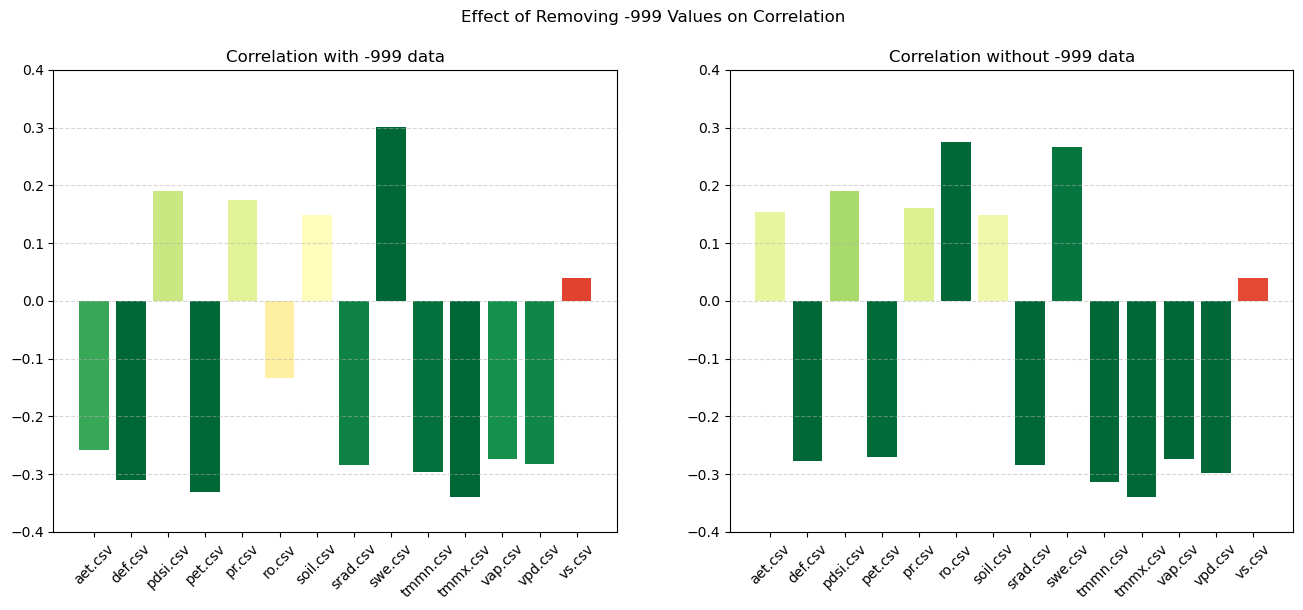

In [17]:
# Create the first plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

# Plot the first bar plot
d1 = corr_dict_w_999
data1 = list(d1.items())
labels1, values1 = zip(*data1)
norm1 = plt.Normalize(0, max(values1))
colors1 = plt.cm.RdYlGn(norm1(np.abs(values1)))
ax1.bar(labels1, values1, color=colors1)
ax1.set_ylim([-0.4, 0.4])
ax1.set_xticklabels(labels1, rotation=45)
ax1.set_title('Correlation with -999 data')
ax1.grid(True, axis='y', linestyle='--', alpha=0.5, which='both')

# Plot the second bar plot
d2 = corr_dict_wo_999
data2 = list(d2.items())
labels2, values2 = zip(*data2)
norm2 = plt.Normalize(0, max(values2))
colors2 = plt.cm.RdYlGn(norm2(np.abs(values2)))
ax2.bar(labels2, values2, color=colors2)
ax2.set_ylim([-0.4, 0.4])
ax2.set_xticklabels(labels2, rotation=45)
ax2.set_title('Correlation without -999 data')
ax2.grid(True, axis='y', linestyle='--', alpha=0.5, which='both')

# Set the overall plot title
plt.suptitle('Effect of Removing -999 Values on Correlation')

# Show the plot
plt.show()

- Should we use all the TS data or just the ones that are correlated with the OC?
- as we saw in the last section, the `swe` has one of the lowest correlation with the OC, since it is mostly noise data.

## Correlation between the `Max` TS data and the OC Excluding the `-999` Data
`TRMM` was showing a low correlation with the OC, when we were averaging, but it has a `higher correlation` when we are using the `max` value.

In [18]:
corr_dict_max = {}
print("Correlation: ")
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df = pd.merge(df,oc_df, on='Point_ID')
    df = df.sort_index(axis=1)
    df_ts = df.iloc[:, :len(dates)]
    df_ts.replace(-999, np.nan, inplace=True)
    df['ts_mean'] = df_ts.max(axis=1, skipna=True)
    correlation = df['OC'].corr(df['ts_mean'])
    corr_dict_max[csv_file.split('_')[1]] = correlation


Correlation: 


## Correlation between the `Min` TS data and the OC Excluding the `-999` Data

In [19]:
corr_dict_min = {}
print("Correlation: ")
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df = pd.merge(df,oc_df, on='Point_ID')
    df = df.sort_index(axis=1)
    df_ts = df.iloc[:, :len(dates)]
    df_ts.replace(-999, np.nan, inplace=True)
    df['ts_mean'] = df_ts.min(axis=1, skipna=True)
    correlation = df['OC'].corr(df['ts_mean'])
    corr_dict_min[csv_file.split('_')[1]] = correlation


Correlation: 


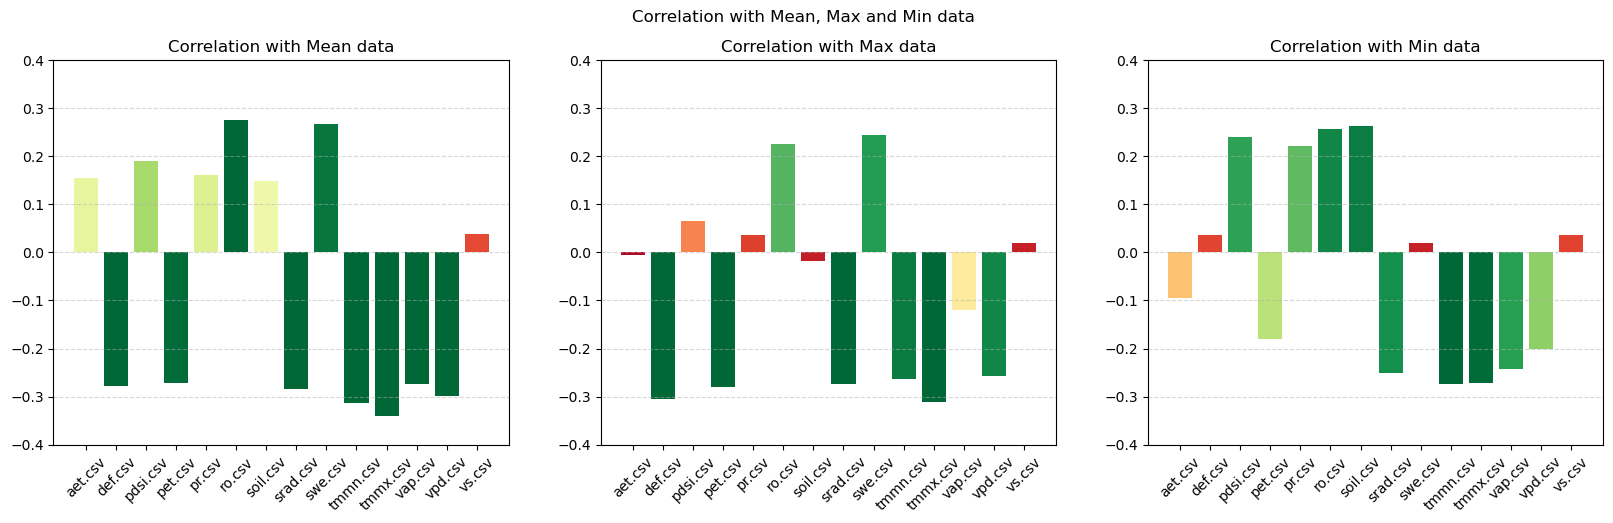

In [20]:
# Create the first plot
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(20,5))

# Plot the first bar plot
d1 = corr_dict_wo_999
data1 = list(d1.items())
labels1, values1 = zip(*data1)
norm1 = plt.Normalize(0, max(values1))
colors1 = plt.cm.RdYlGn(norm1(np.abs(values1)))
ax1.bar(labels1, values1, color=colors1)
ax1.set_ylim([-0.4, 0.4])
ax1.set_xticks(range(len(labels1))) # I don;t know why but it removes the warning of the next line
ax1.set_xticklabels(labels1, rotation=45)
ax1.set_title('Correlation with Mean data')
ax1.grid(True, axis='y', linestyle='--', alpha=0.5, which='both')

# Plot the second bar plot
d2 = corr_dict_max
data2 = list(d2.items())
labels2, values2 = zip(*data2)
norm2 = plt.Normalize(0, max(values1))
colors2 = plt.cm.RdYlGn(norm2(np.abs(values2)))
ax2.bar(labels2, values2, color=colors2)
ax2.set_ylim([-0.4, 0.4])
ax2.set_xticks(range(len(labels2))) # I don;t know why but it removes the warning of the next line
ax2.set_xticklabels(labels2, rotation=45)
ax2.set_title('Correlation with Max data')
ax2.grid(True, axis='y', linestyle='--', alpha=0.5, which='both')

# Plot the second bar plot
d3 = corr_dict_min
data3 = list(d3.items())
labels3, values3 = zip(*data3)
norm3 = plt.Normalize(0, max(values1))
colors3 = plt.cm.RdYlGn(norm3(np.abs(values3)))
ax3.bar(labels3, values3, color=colors3)
ax3.set_ylim([-0.4, 0.4])
ax3.set_xticks(range(len(labels3))) # I don;t know why but it removes the warning of the next line
ax3.set_xticklabels(labels3, rotation=45)
ax3.set_title('Correlation with Min data')
ax3.grid(True, axis='y', linestyle='--', alpha=0.5, which='both')

# Set the overall plot title
plt.suptitle('Correlation with Mean, Max and Min data')

# Show the plot
plt.show()

## Checking the Histograms of each Climate Feature
This will help us to find the max and min values of the normalization

In [21]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import os
import matplotlib.pyplot as plt

In [22]:
# Get the current working directory
cwd = os.getcwd()
# List all files in the directory and filter for .csv files
csv_files = [f for f in os.listdir(cwd) if os.path.isfile(os.path.join(cwd, f)) and f.endswith('.csv')]
print(csv_files)

['_aet.csv', '_def.csv', '_pdsi.csv', '_pet.csv', '_pr.csv', '_ro.csv', '_soil.csv', '_srad.csv', '_swe.csv', '_tmmn.csv', '_tmmx.csv', '_vap.csv', '_vpd.csv', '_vs.csv']


In [23]:
feature_names = [x.split('_')[1] for x in csv_files]

As we can see in the below plots, normalization without cutting the outliner data works just fine.

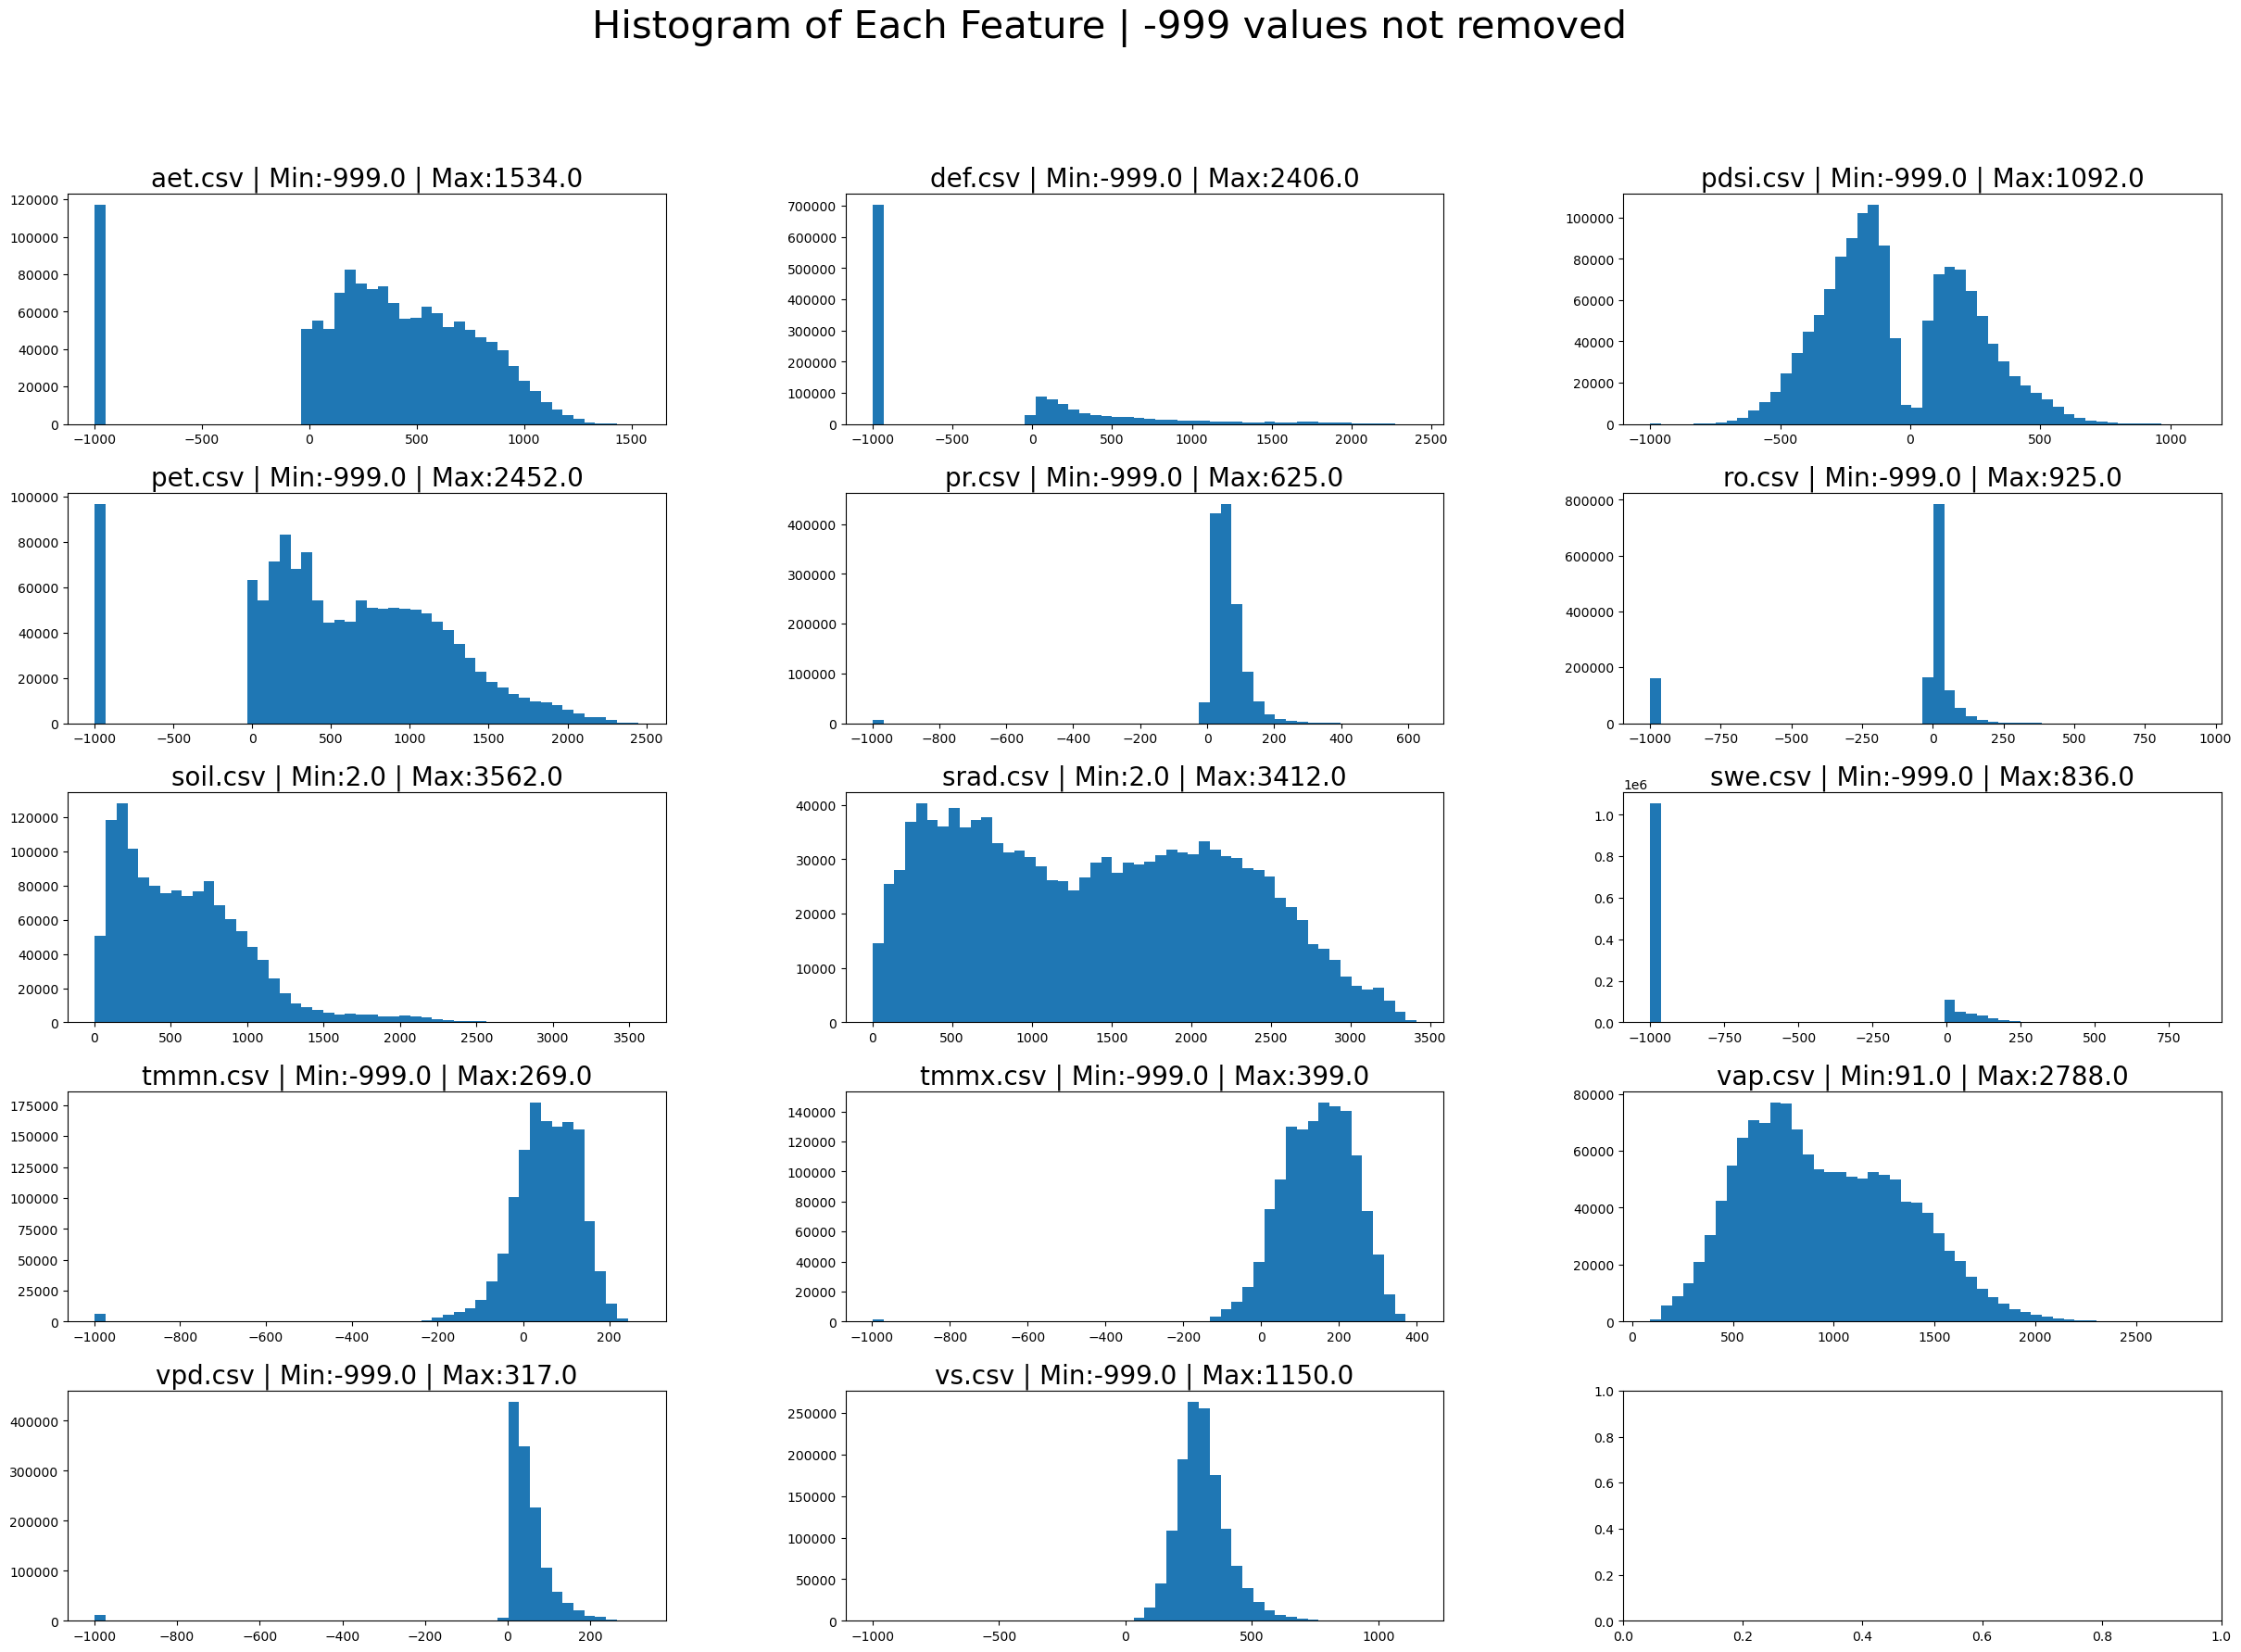

In [24]:
vals_list = []
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df = df.iloc[:, :len(dates)]
    vals = df.values.reshape(-1)
    vals_list.append(vals)
len(vals_list)


# Create a figure with multiple subplots
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(30, 20))

# Loop through each array and plot its histogram in a different subplot
for i in range(len(vals_list)):
    ax = axs[i // 3, i % 3]  # Select the appropriate subplot
    ax.hist(vals_list[i], bins=50)  # Create the histogram in the subplot
    ax.set_title(f'{feature_names[i]} | Min:{np.min(vals_list[i])} | Max:{np.max(vals_list[i])}', fontsize=20)    # Add a title to the subplot

# Add a global title and show the plot
plt.subplots_adjust(wspace=0.3, hspace=0.3)
fig.suptitle('Histogram of Each Feature | -999 values not removed', fontsize=30)
plt.show()

### The histogram after converting -999 to NaN values.
I seems like that `ro` can benefit form outliner removal.

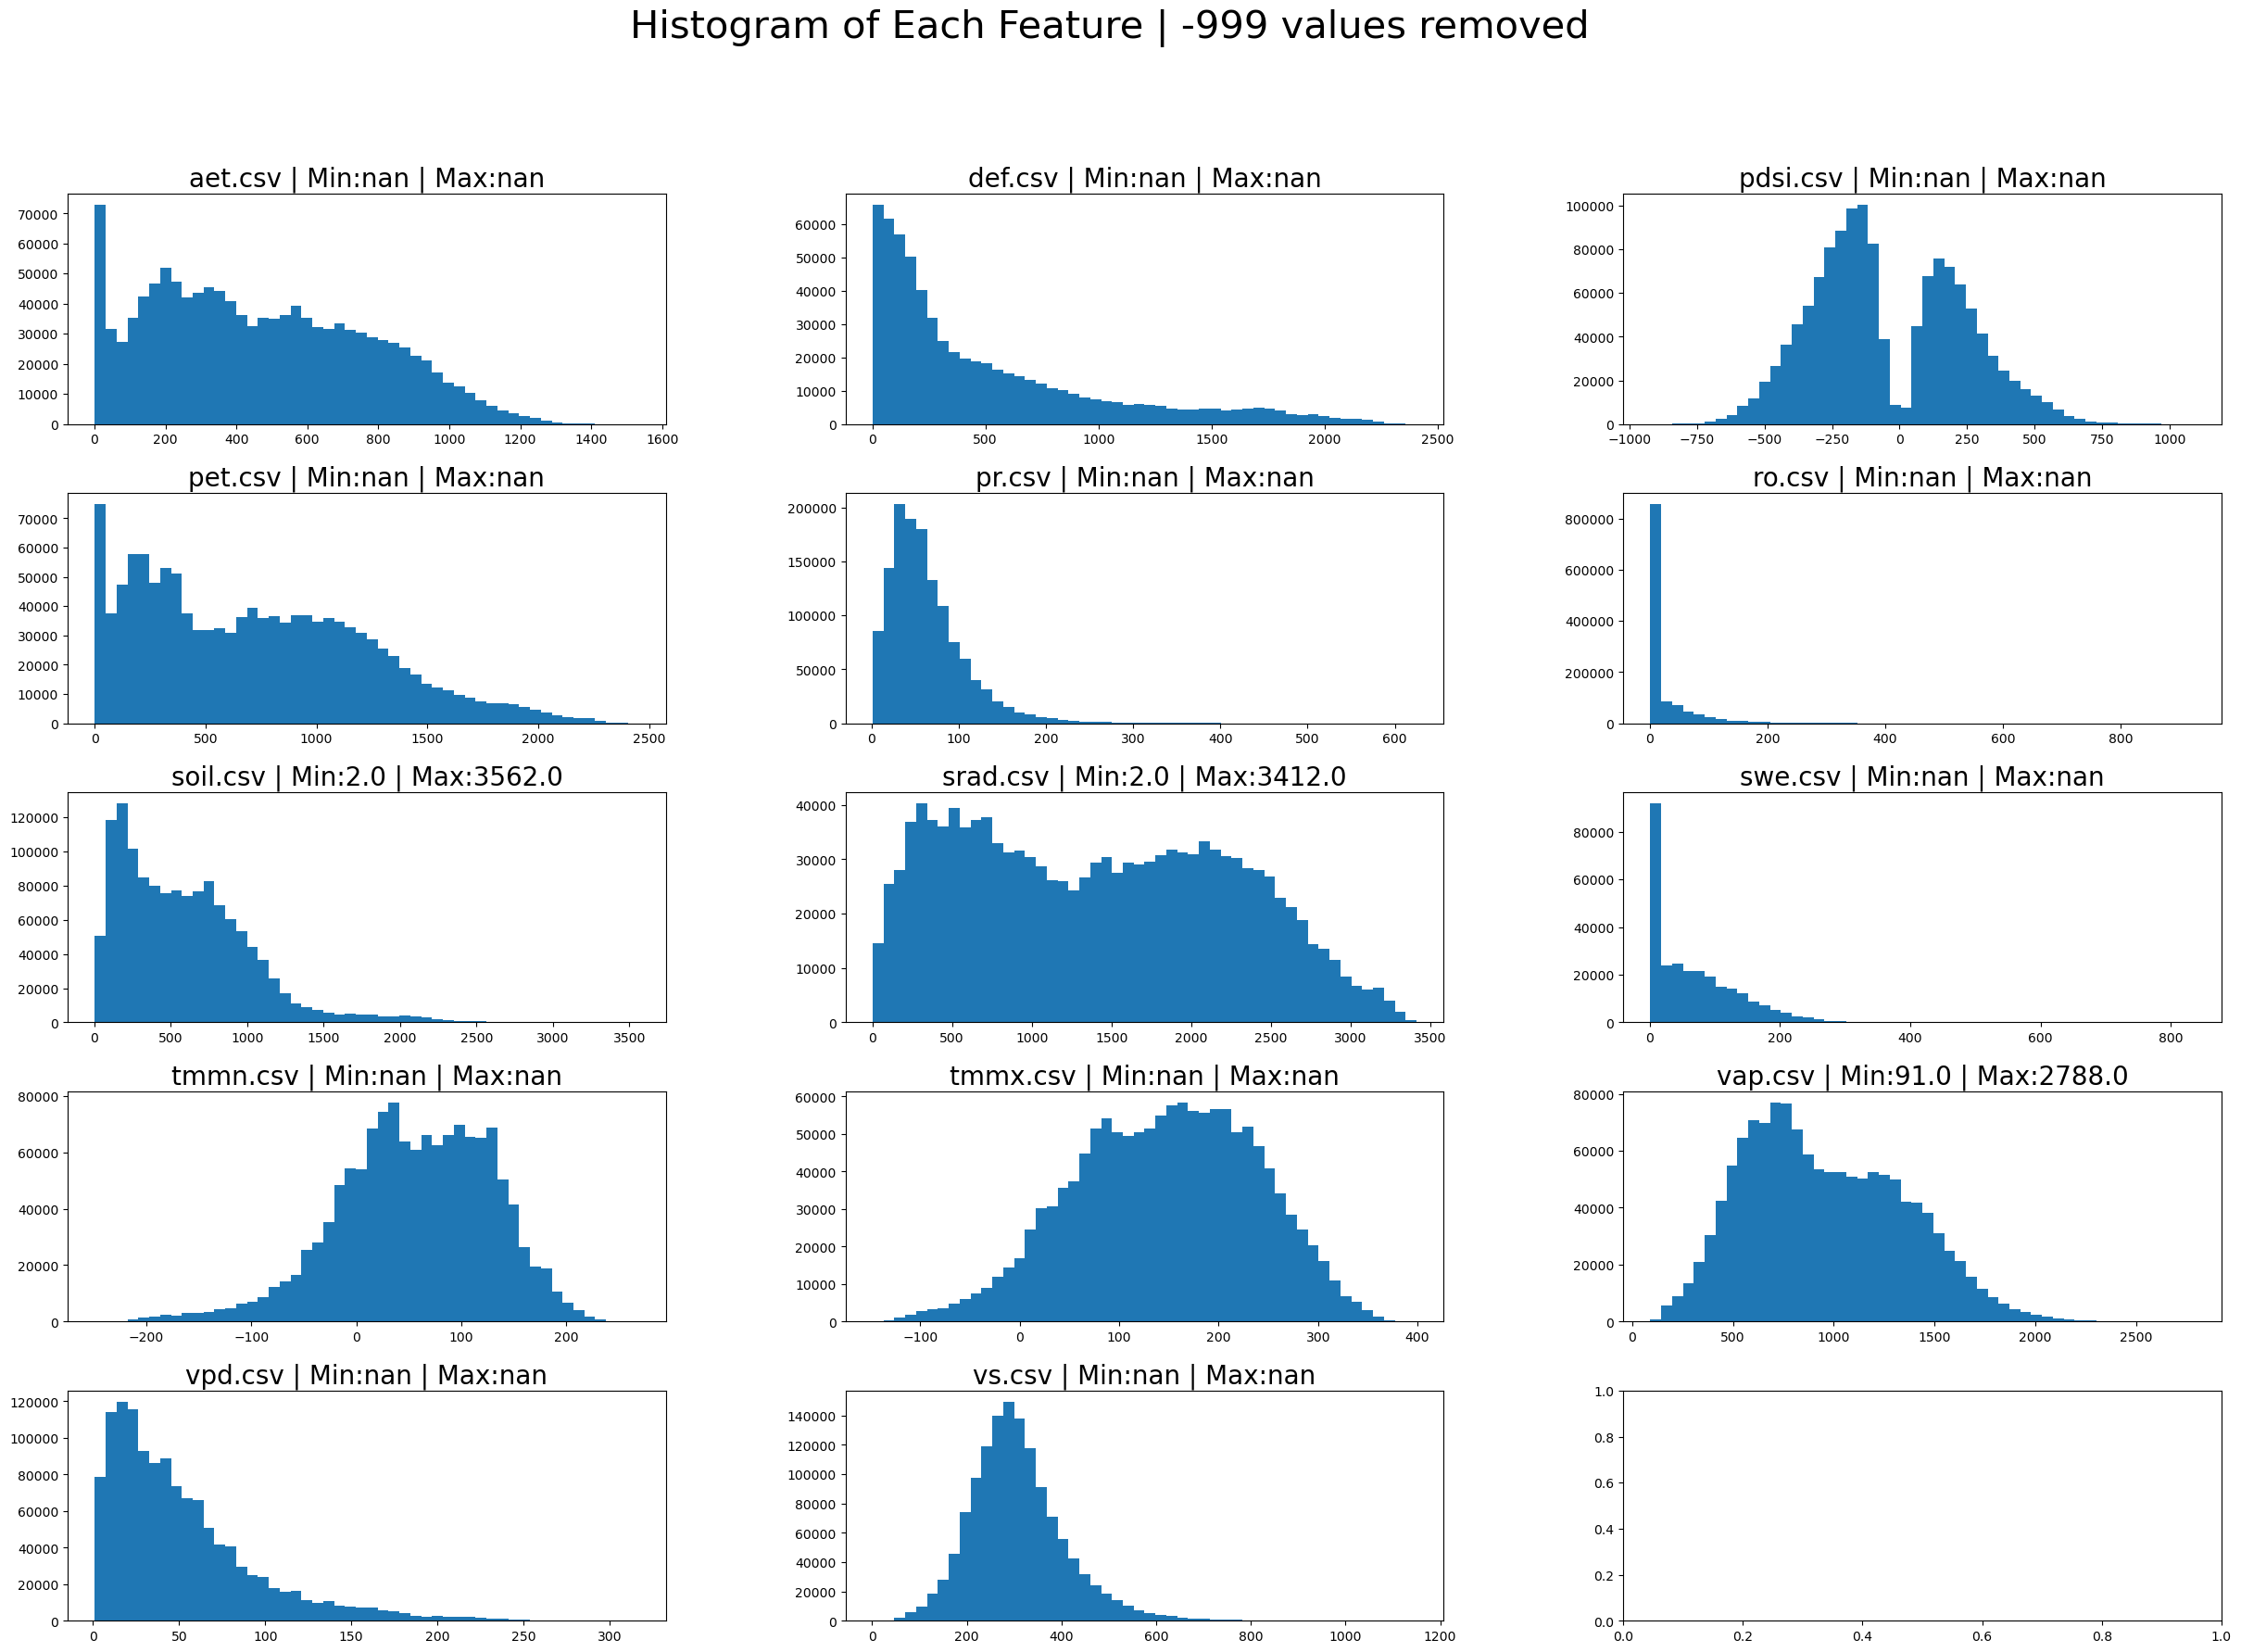

In [25]:
vals_list = []
nans_list = []
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df = df.iloc[:, :len(dates)]
    df = df.replace(-999, np.nan)
    nan_per_column = df.isna().sum()
    vals = df.values.reshape(-1)
    vals_list.append(vals)
    nans_list.append(nan_per_column.values)
len(vals_list)


# Create a figure with multiple subplots
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(30, 20))

# Loop through each array and plot its histogram in a different subplot
for i in range(len(vals_list)):
    ax = axs[i // 3, i % 3]  # Select the appropriate subplot
    ax.hist(vals_list[i], bins=50)  # Create the histogram in the subplot
    ax.set_title(f'{feature_names[i]} | Min:{np.min(vals_list[i])} | Max:{np.max(vals_list[i])}', fontsize=20)    # Add a title to the subplot

# Add a global title and show the plot
plt.subplots_adjust(wspace=0.3, hspace=0.3)
fig.suptitle('Histogram of Each Feature | -999 values removed', fontsize=30)
plt.show()

# Plot of the Montly NaN values in Each feautre
- `swe` didn't show a high correlation, and has a lot of NaN values, it is really hard to interpolate tha NaN Values | 
<span style="color:#ff4444;">Should we Drop swe?!</span>

- on the other hand `def` showed one of the highes correlations, but it also has a high number of NaN values | 
<span style="color:#44ff44">would interpolation work here?</span>

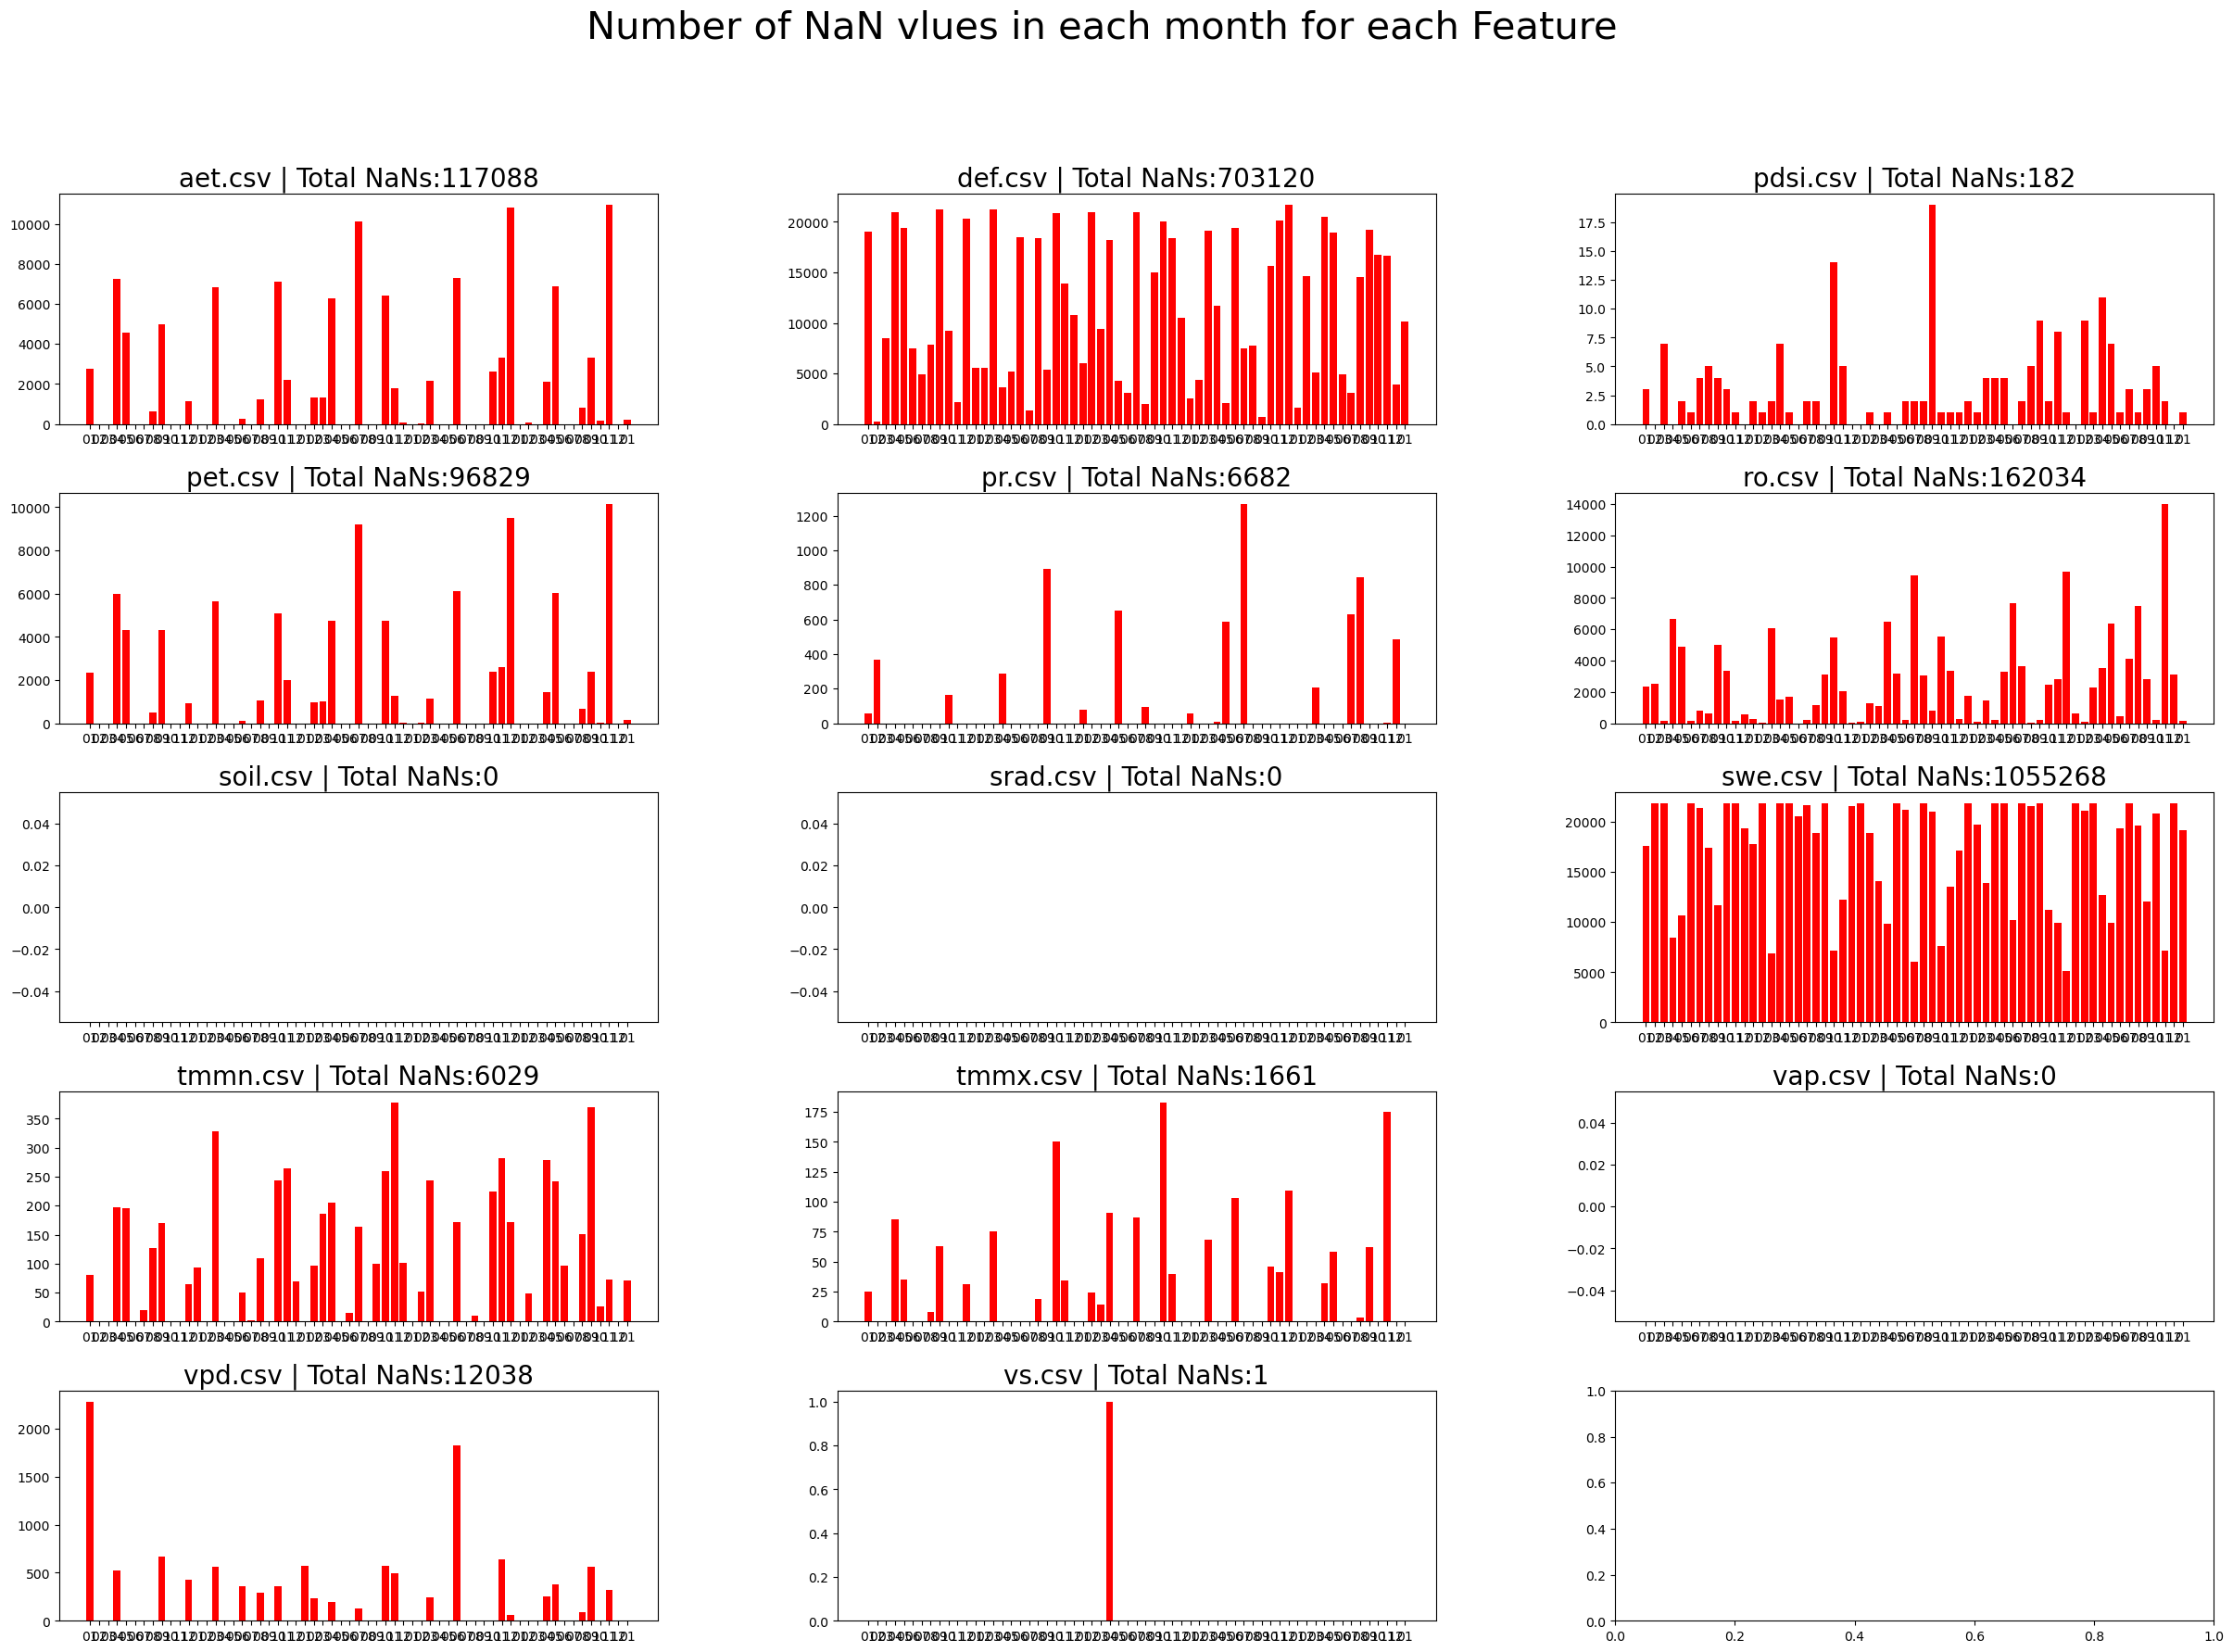

In [26]:
# Create a figure with multiple subplots
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(30, 20))

# Loop through each array and plot its histogram in a different subplot
for i in range(len(nans_list)):
    ax = axs[i // 3, i % 3]  # Select the appropriate subplot
    ax.bar(dates, nans_list[i], color='red')  # Create the histogram in the subplot
    ax.set_title(f'{feature_names[i]} | Total NaNs:{np.min(nans_list[i].sum())}', fontsize=20)  # Add a title to the subplot
    ax.set_xticks(range(len(dates)))
    dates_wo_year = [f"{x[4:6]}" for x in dates]
    ax.set_xticklabels(dates_wo_year, rotation=0)
# Add a global title and show the plot
plt.subplots_adjust(wspace=0.3, hspace=0.3)
fig.suptitle('Number of NaN vlues in each month for each Feature', fontsize=30)
plt.show()

## sklearn.impute.KNNImputer

https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html


imputing `NaN` values uising `KNNImputer`

`TODO`: Check How good the resulats are

In [27]:
from sklearn.impute import KNNImputer

In [28]:
vals_list = []
nans_list = []
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df = df.iloc[:, :len(dates)]
    df = df.replace(-999, np.nan)
    
    X = df.values
    
    # Initialize a KNNImputer with k=5 (the default)
    imputer = KNNImputer(n_neighbors=5, keep_empty_features=True) # keep_empty_features=True if False, it will remove the column if it is all NaNs 
                                                                    # Make it False to see how many columns are removed from `swe` and `def`
    X_imputed = imputer.fit_transform(X)
    df= pd.DataFrame(X_imputed)
    
    nan_per_column = df.isna().sum()
    vals = df.values.reshape(-1)
    vals_list.append(vals)
    nans_list.append(nan_per_column.values)
len(vals_list)

KeyboardInterrupt: 

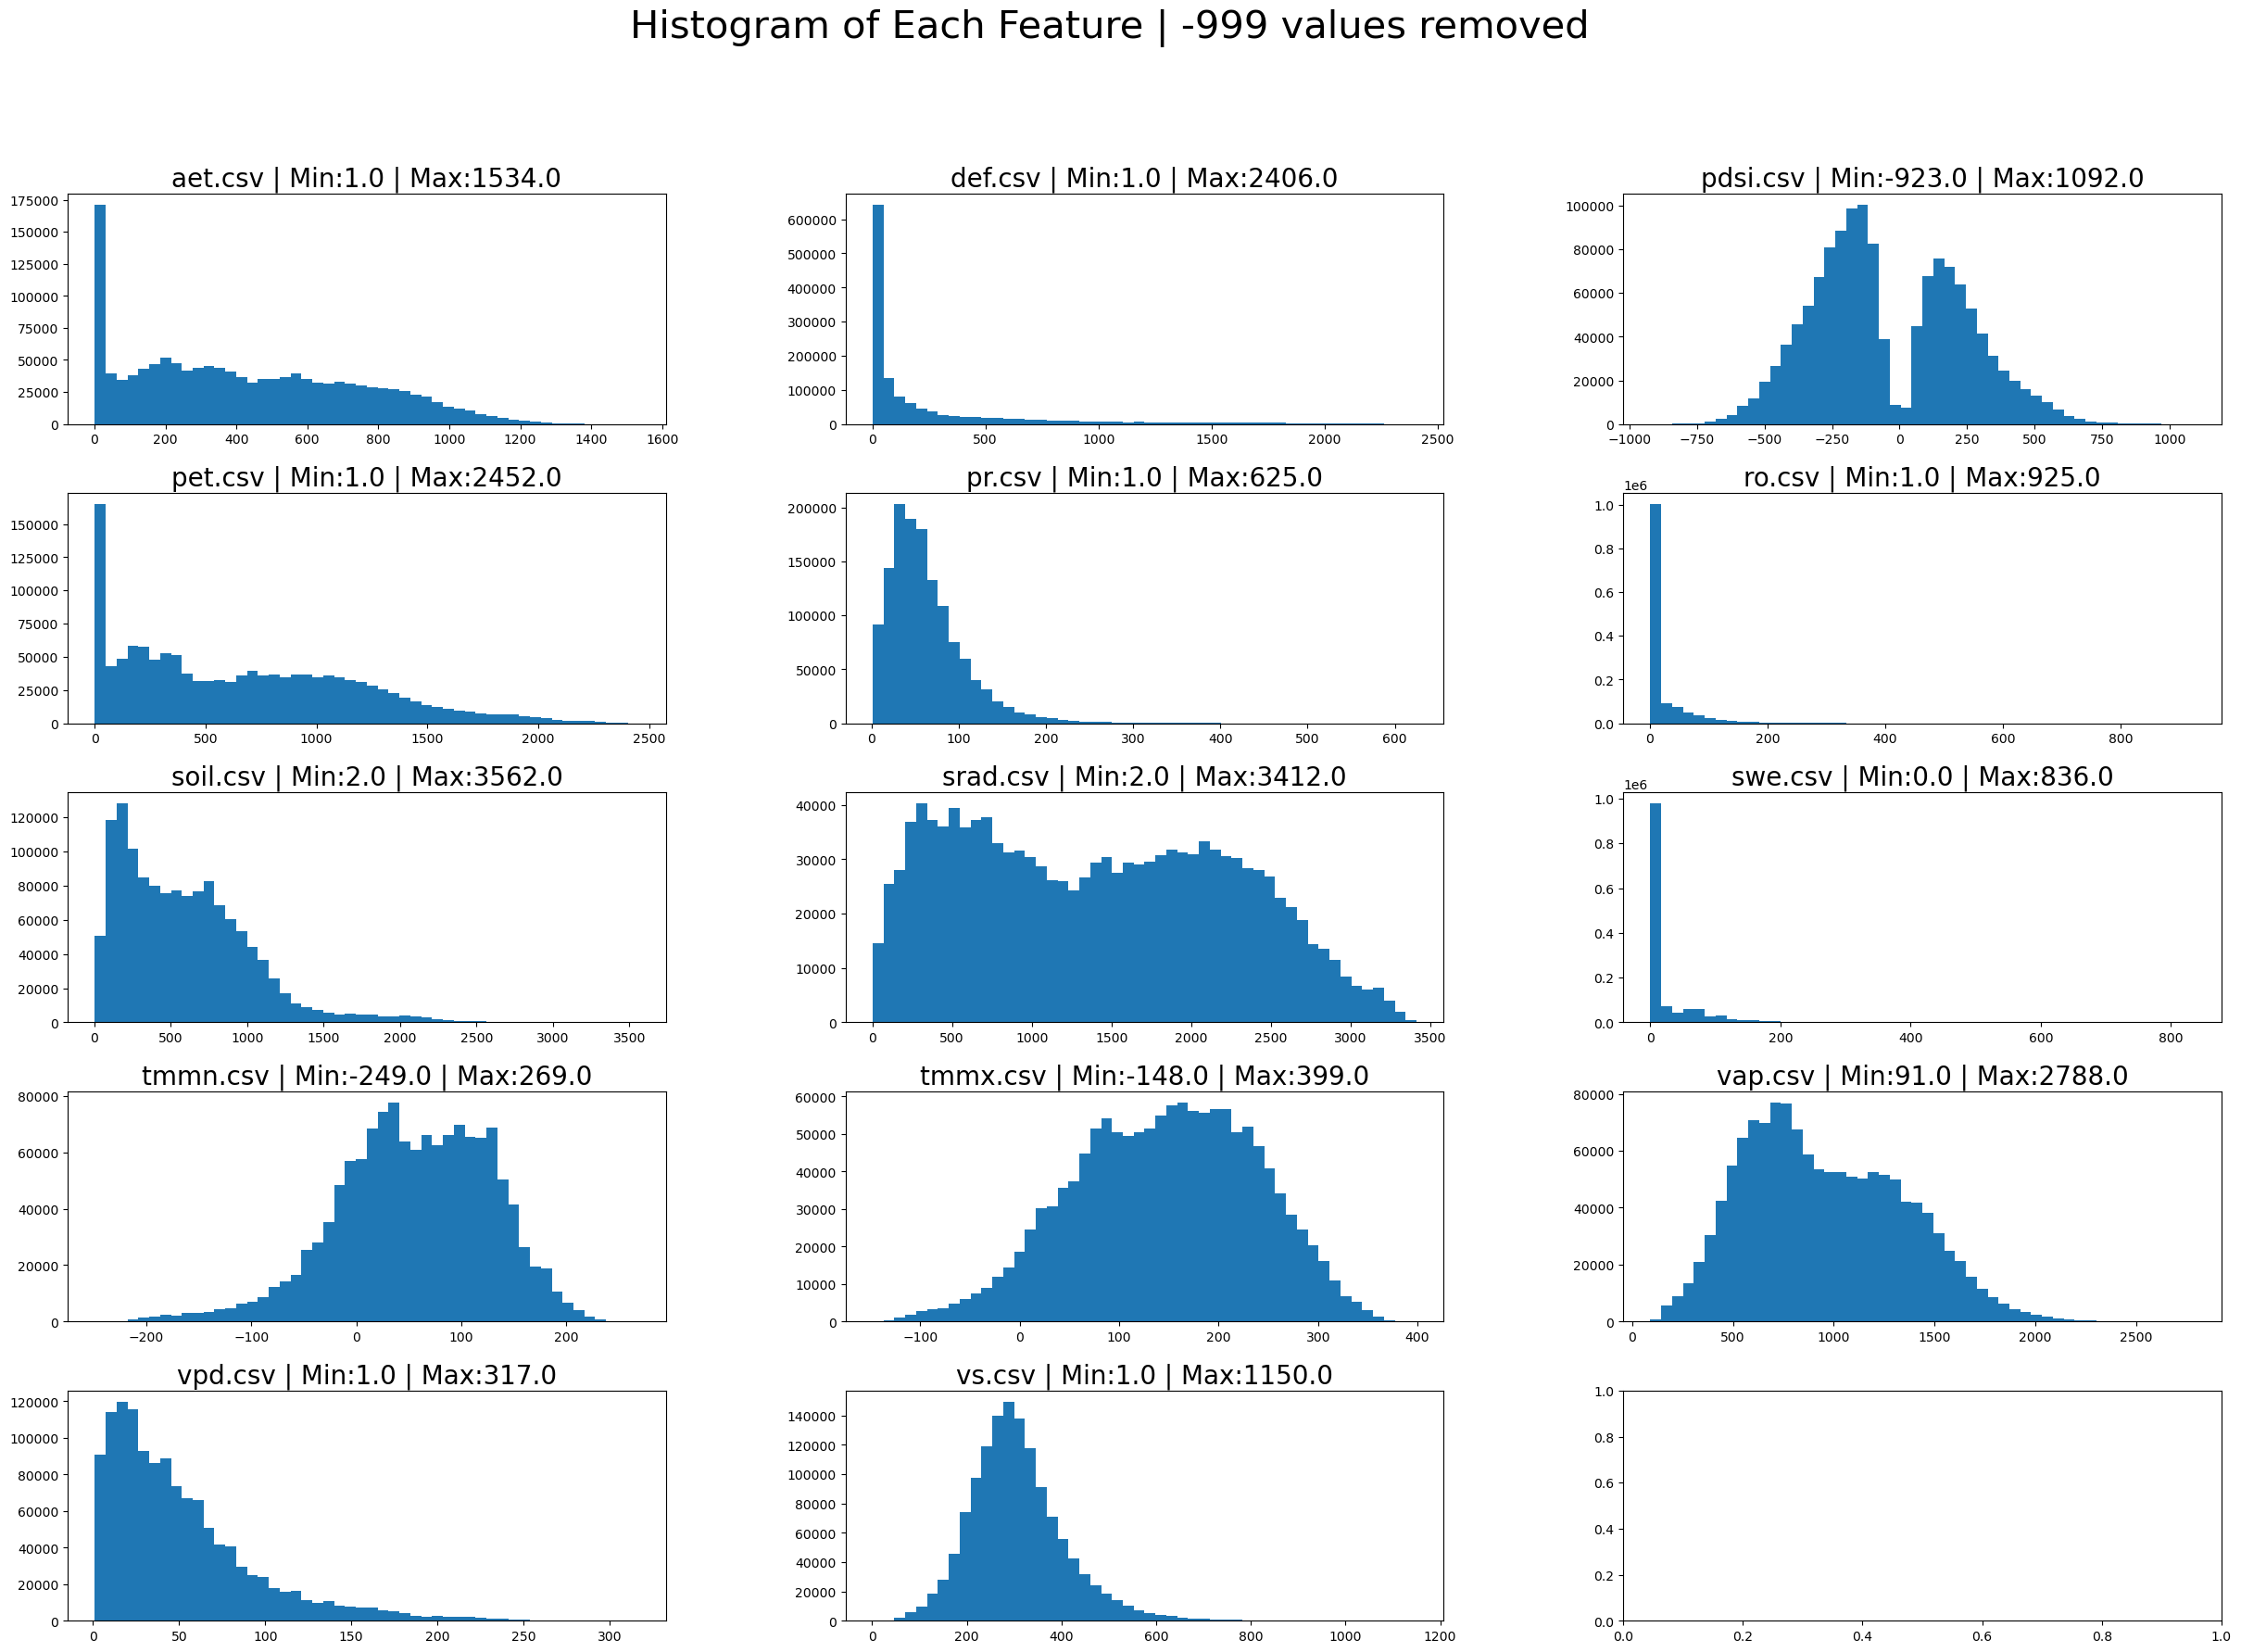

In [ ]:
# Create a figure with multiple subplots
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(30, 20))

# Loop through each array and plot its histogram in a different subplot
for i in range(len(vals_list)):
    ax = axs[i // 3, i % 3]  # Select the appropriate subplot
    ax.hist(vals_list[i], bins=50)  # Create the histogram in the subplot
    ax.set_title(f'{feature_names[i]} | Min:{np.min(vals_list[i])} | Max:{np.max(vals_list[i])}', fontsize=20)    # Add a title to the subplot

# Add a global title and show the plot
plt.subplots_adjust(wspace=0.3, hspace=0.3)
fig.suptitle('Histogram of Each Feature | -999 values removed', fontsize=30)
plt.show()

In [ ]:
print("NaNs in each feature: ")
for i in range(len(nans_list)):
    print(f" {feature_names[i]}: ",nans_list[i])

NaNs in each feature: 
 aet.csv:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 def.csv:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 pdsi.csv:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 pet.csv:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 pr.csv:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 ro.csv:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 soil.csv:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 srad.csv:  [0 0 0 0 0 0 

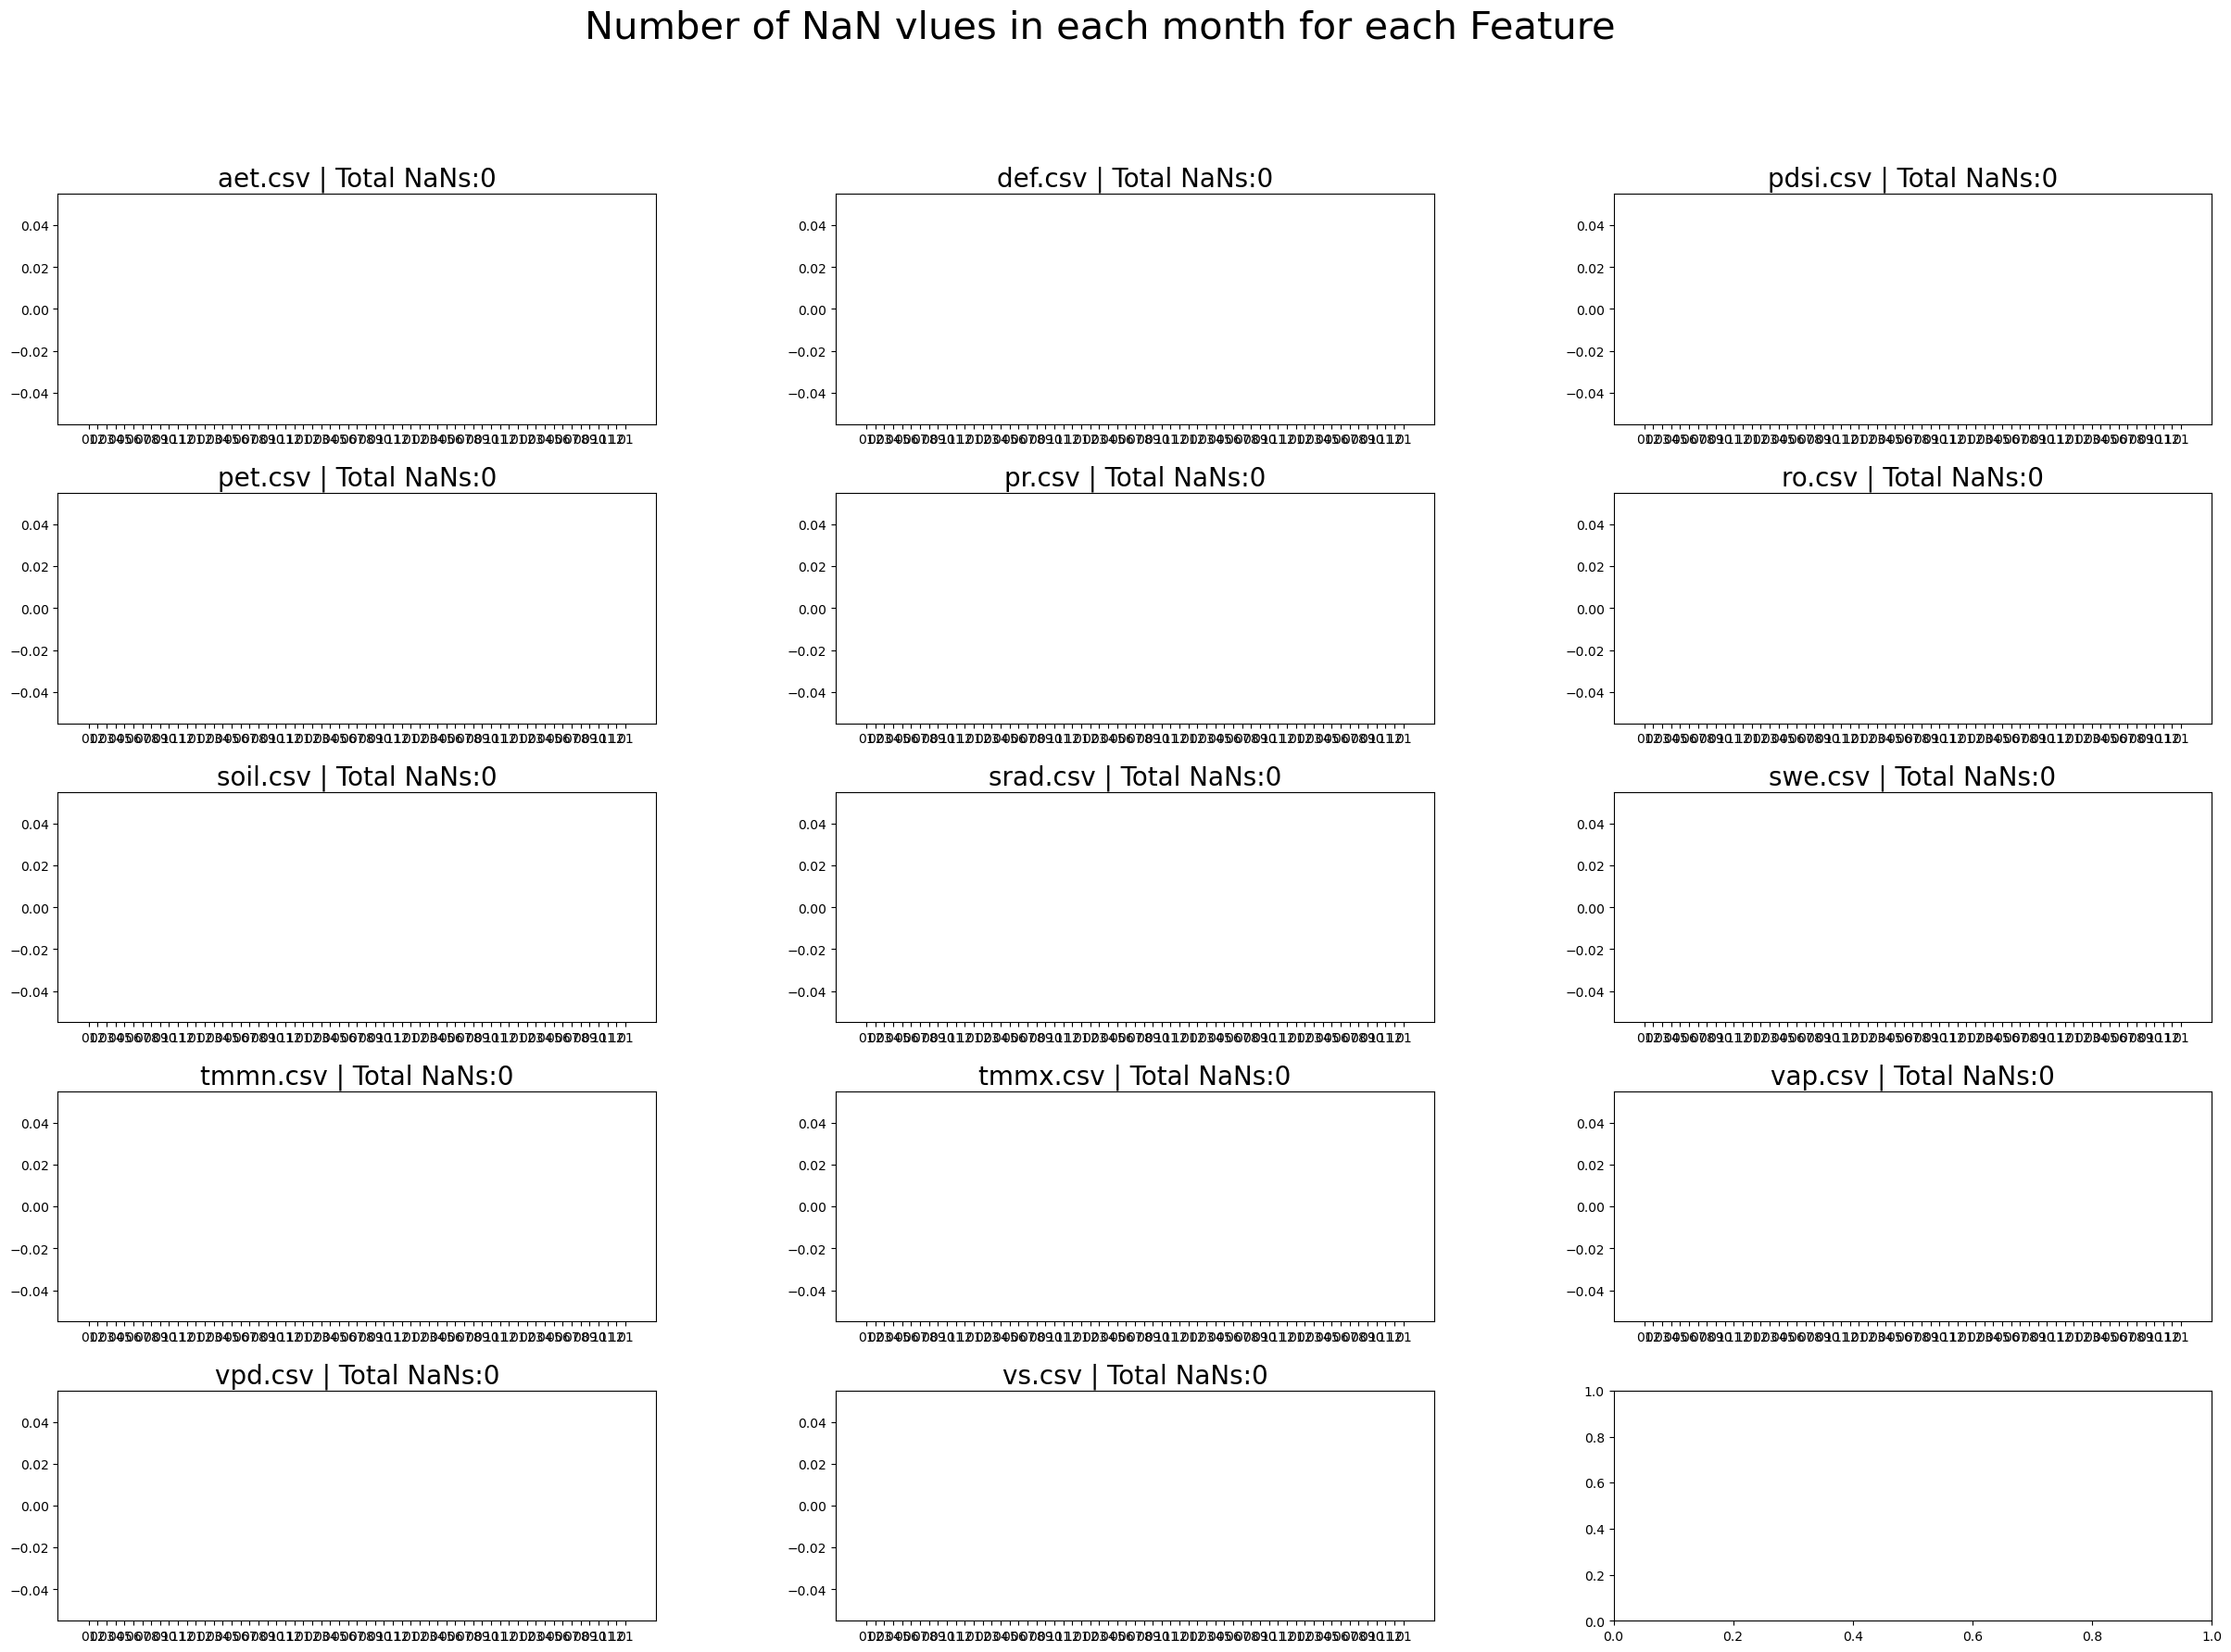

In [ ]:
# Create a figure with multiple subplots
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(30, 20))

# Loop through each array and plot its histogram in a different subplot
for i in range(len(nans_list)):
    ax = axs[i // 3, i % 3]  # Select the appropriate subplot
    ax.bar(dates, nans_list[i], color='red')  # Create the histogram in the subplot
    ax.set_title(f'{feature_names[i]} | Total NaNs:{np.min(nans_list[i].sum())}', fontsize=20)  # Add a title to the subplot
    ax.set_xticks(range(len(dates)))
    dates_wo_year = [f"{x[4:6]}" for x in dates]
    ax.set_xticklabels(dates_wo_year, rotation=0)
# Add a global title and show the plot
plt.subplots_adjust(wspace=0.3, hspace=0.3)
fig.suptitle('Number of NaN vlues in each month for each Feature', fontsize=30)
plt.show()

## Climate Data Fixed Version
ussing knn we write new csv files where the -999 values are replaced with the mean of the nearest neighbors.

In [29]:
for csv_file in csv_files:
    df_all = pd.read_csv(csv_file)
    df_all = pd.merge(df_all,oc_df, on='Point_ID')
    df_all = df_all.sort_index(axis=1)
    df = df_all[dates]
    df = df.replace(-999, np.nan)
    
    X = df.values
    
    # Initialize a KNNImputer with k=5 (the default)
    imputer = KNNImputer(n_neighbors=5, keep_empty_features=True) # keep_empty_features=True if False, it will remove the column if it is all NaNs 
                                                                    # Make it False to see how many columns are removed from `swe` and `def`
    X_imputed = imputer.fit_transform(X)
    df= pd.DataFrame(X_imputed)
    
    df_all[dates] = df
    
    df_all.to_csv(f'filled/{csv_file.split(sep=".")[0]}_filled.csv', index=False)

len(vals_list)

8

(21859, 61)
(1333399,)
1092.0


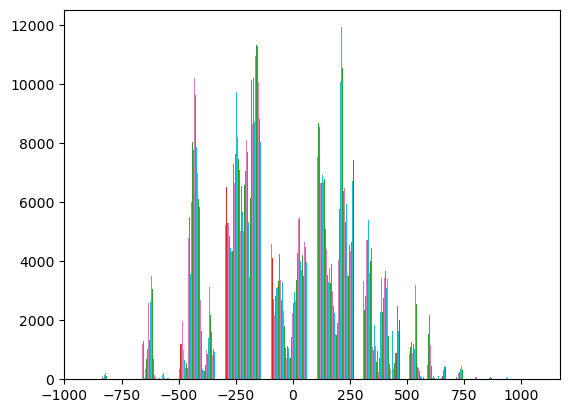

In [41]:
df_all = pd.read_csv("D:\\python\\SoilNet\\dataset\\Climate\\New\\filled\\_pdsi_filled.csv")
df_all = pd.merge(df_all,oc_df, on='Point_ID')
df_all = df_all.sort_index(axis=1)
df = df_all[dates]
df = df.replace(-999, np.nan)
X = df.values
print(X.shape)
print(X.flatten().shape)
print(np.max(X))
plt.hist(X)
plt.show()



## Test: Reading a PointID data and putting it in a tensor

In [30]:
# Reading the climate csv files
climate_csvs_dir = "D:\python\SoilNet\dataset\Climate\\filled"
climate_csvs = [f for f in os.listdir(climate_csvs_dir) if os.path.isfile(os.path.join(climate_csvs_dir, f)) and f.endswith('.csv')]
climate_df_list = []
for climate_csv in climate_csvs:
    climate_df_list.append(pd.read_csv(os.path.join(climate_csvs_dir, climate_csv)))

In [42]:
df_vals = climate_df_list[4].iloc[:,:len(dates)].values

In [47]:
df_vals_norm = (df_vals - df_vals.min()) / (df_vals.max() - df_vals.min())
print(df_vals_norm.min(), df_vals_norm.max(), df_vals_norm.shape)

0.0 1.0 (1686, 12)


In [31]:
# random number between 0 and 1660
random_number = np.random.randint(0, 1686)
print("Random number: ", random_number)
df = pd.read_csv(csv_files[0])
random_row = df.iloc[random_number]
PID = random_row['Point_ID']
print("Point ID: ", PID)

Random number:  231
Point ID:  43022872


In [32]:
climate_row_list = [df[df['Point_ID'] == PID] for df in climate_df_list]
climate_row_vals = [row.iloc[:, :len(dates)].values[0] for row in climate_row_list]

len(climate_row_vals)

14

In [57]:
row = df[df['Point_ID'] == int(43022872)]
print(row.values.shape, row.values[0].shape)

(1, 40) (40,)


In [52]:
climate_row_vals[7].shape

(12,)

In [53]:
climate_row_vals[7].values[0]

AttributeError: 'numpy.ndarray' object has no attribute 'values'

*TASK* : Read the proper columns of each df row and stack them in a numpy array then convert to tesnor

In [ ]:
climate_stcked_array = np.stack(climate_row_vals)
climate_stcked_array.shape

(14, 12)

In [ ]:
dummpy_list = [
    np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]),
    np.arange(12, 24),
    np.arange(24, 36),
]

In [ ]:
np.stack(dummpy_list).T

array([[ 1, 12, 24],
       [ 2, 13, 25],
       [ 3, 14, 26],
       [ 4, 15, 27],
       [ 5, 16, 28],
       [ 6, 17, 29],
       [ 7, 18, 30],
       [ 8, 19, 31],
       [ 9, 20, 32],
       [10, 21, 33],
       [11, 22, 34],
       [12, 23, 35]])

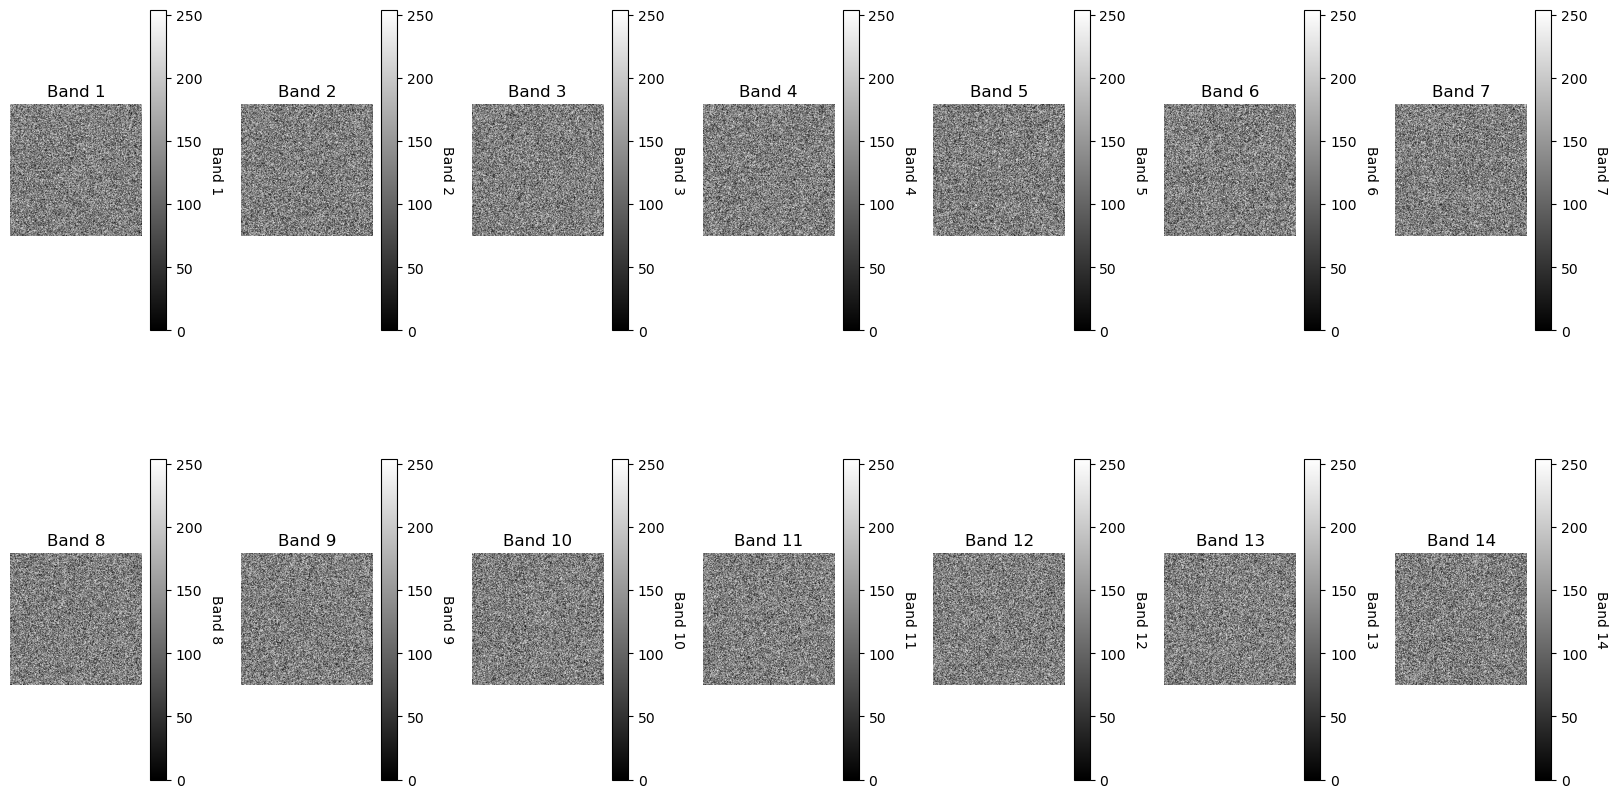

In [59]:
def plot_bands(image, labels):
    fig, axs = plt.subplots(2, 7, figsize=(20, 10))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    axs = axs.ravel()

    for i in range(image.shape[2]):
        axs[i].imshow(image[:, :, i], cmap='gray')
        axs[i].set_title(labels[i])
        axs[i].set_axis_off()
        cbar = plt.colorbar(axs[i].imshow(image[:, :, i], cmap='gray'), ax=axs[i])
        cbar.ax.set_ylabel(labels[i], rotation=270, labelpad=15)
        
    plt.show()
labels = ['Band 1', 'Band 2', 'Band 3', 'Band 4', 'Band 5', 'Band 6', 'Band 7', 
          'Band 8', 'Band 9', 'Band 10', 'Band 11', 'Band 12', 'Band 13', 'Band 14'  ]
rand_img = np.random.randint(0, 255, size=(256, 256, 14))

plot_bands(rand_img, labels)


In [91]:
def plot_bands(image, labels, array):
    fig, axs = plt.subplots(3, 7, figsize=(15, 10))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    axs = axs.ravel()

    for i in range(image.shape[2]):
        axs[i].imshow(image[:, :, i], cmap='gray')
        axs[i].set_title(labels[i])
        axs[i].set_axis_off()
        cbar = plt.colorbar(axs[i].imshow(image[:, :, i], cmap='gray'), ax=axs[i])
        cbar.ax.set_ylabel(labels[i], rotation=270, labelpad=15)
        
    # Add the additional plot
    dates = np.arange(1, 13)
    rows = array
    ax_mean = fig.add_subplot(3, 1, 3)
    for i, arr in enumerate(rows):
        ax_mean.plot(dates, arr, label=labels[i])
        # Calculate and add the mean value label
        mean_val = np.mean(arr)
        ax_mean.text(dates[-1], arr[-1], f"Mean: {mean_val:.2f}", va='center', ha='left', color='black')

    # Set the plot title and legend
    ax_mean.set_title('Climate Data over Time')
    ax_mean.legend(loc='upper right')
    #ax_mean.set_xticks(dates)
    ax_mean.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45, ha='right')

    plt.show()


(14, 12)


C:\Users\moi3n\AppData\Local\Temp\ipykernel_22684\980242850.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_mean.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45, ha='right')


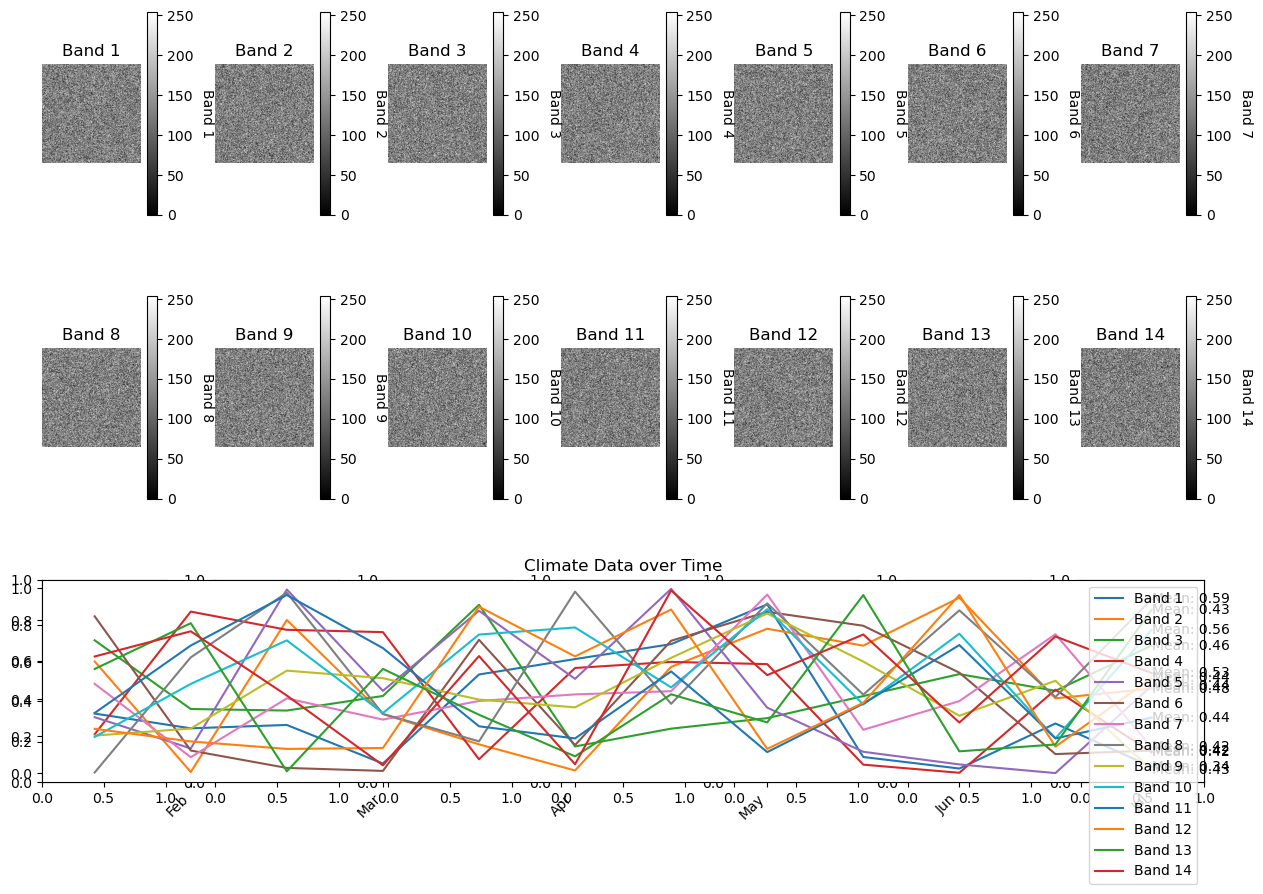

In [92]:
labels = ['Band 1', 'Band 2', 'Band 3', 'Band 4', 'Band 5', 'Band 6', 'Band 7', 
          'Band 8', 'Band 9', 'Band 10', 'Band 11', 'Band 12', 'Band 13', 'Band 14'  ]
rand_img = np.random.randint(0, 255, size=(256, 256, 14))

rand_array = np.random.random(size=(14, 12))
print(rand_array.shape)

plot_bands(rand_img, labels,rand_array)